# <center>"Mini Project 01"</center>

Objective:

- Generating Data with noise.
- Plottng single file data with best fit curves.
- Multiple File Handling.

In [1]:
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

### Defining Function for distribution

In [3]:
def func(x, a, b, c):
    return (a * np.exp(-b*x) + c)

### Generating data (with noise) and plotting it with curve fit:

Step 1- Generating clean data

In [5]:
x_data = np.linspace(0, 4, 50)
y = func(x_data, 2.5, 1.3, 0.5)
rng = np.random.default_rng()

Adding noise to the data:

In [6]:

y_noise = 0.2 * rng.normal(size=x_data.size)

y_data = y + y_noise


Step 3- Plotting oringinal data (blue):


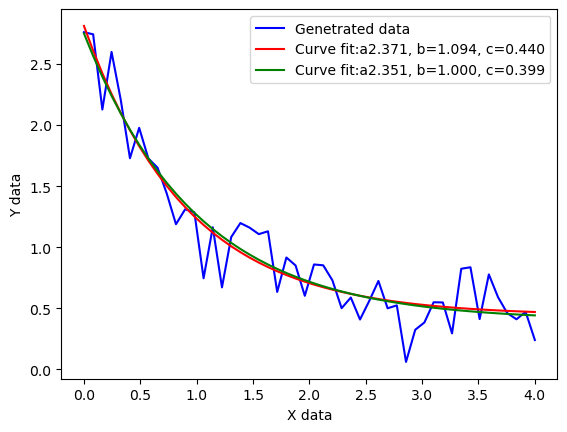

In [8]:
plt.plot(x_data, y_data, 'b-', label= 'Genetrated data');

#Step 4- Executing curve_fit on noise data (Red) and (Green) plotting it.:
popt,pcov = curve_fit(func, x_data, y_data)
plt.plot(x_data, func(x_data, *popt), 'r-', label= 'Curve fit:a%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

popt,pcov = curve_fit(func, x_data, y_data, bounds=(0,[3.0, 1.0, 0.5]))
plt.plot(x_data, func(x_data, *popt), 'g-', label= 'Curve fit:a%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

#Adding title and labels to the plot:
plt.xlabel('X data')
plt.ylabel('Y data')
plt.legend()
plt.show()

## Ex 02 (Gaussian Curve fit):

Step 1- Generating clean data:

In [9]:

xd = np.arange(10)
yd = np.array([0, 1, 2, 3, 4, 5, 4, 3, 2, 1])

mean = sum(xd * yd) / sum(yd)
sigma = np.sqrt(sum(yd * (xd - mean)**2) / sum(yd))
# weighted arithmetic mean

Step 2- Defining function for Gaussian distribution:

In [10]:
def gauss(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

popt,pcov = curve_fit(gauss, xd, yd, p0 = [max(yd), mean, sigma])

Step 3- Plotting oringinal data (green):

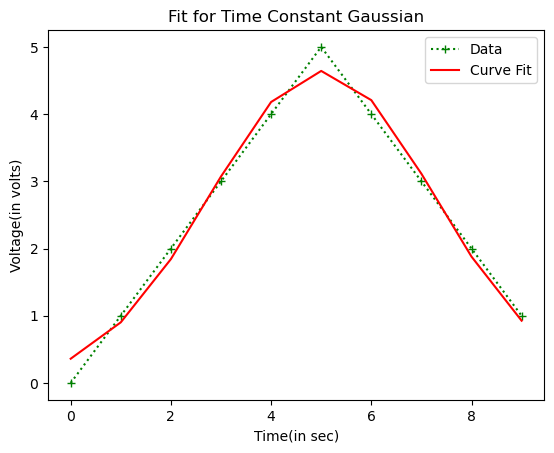

In [11]:
plt.plot(xd, yd, 'g+:', label='Data')

#Step 4- Executing curve_fit on noise data (Red) and plotting it:
plt.plot(xd, gauss(xd, *popt), 'r-', label= 'Curve Fit')

#Adding title and labels to the plot:
plt.legend()
plt.title('Fit for Time Constant Gaussian')
plt.xlabel('Time(in sec)')
plt.ylabel('Voltage(in volts)')
plt.show()

## 2. Plotting Single file with best fit curves:

 True objective Mathematical distribution function to be fitted over the data files

In [12]:
def lognorm(x, mu, sigma):
    return 1/(np.sqrt(2*np.pi*sigma*x)*np.exp(-((np.log(x)-mu)**2)/(2*sigma**2)))

In [14]:
data = np.loadtxt('C:/Users/Nikki/Mini Project Data/file_1.txt')
x, y = data[:, 0], data[:, 1]

In [15]:
print(data)

[[ 2.760e+02 -2.000e-01]
 [ 2.770e+02 -1.700e+00]
 [ 2.780e+02 -1.900e+00]
 [ 2.790e+02 -1.700e+00]
 [ 2.800e+02 -7.000e-01]
 [ 2.810e+02 -1.500e+00]
 [ 2.820e+02 -5.000e-01]
 [ 2.830e+02  0.000e+00]
 [ 2.840e+02  5.000e-01]
 [ 2.850e+02  2.000e-01]
 [ 2.860e+02  1.000e+00]
 [ 2.870e+02  5.000e-01]
 [ 2.880e+02 -7.000e-01]
 [ 2.890e+02 -1.500e+00]
 [ 2.900e+02 -2.000e-01]
 [ 2.910e+02  0.000e+00]
 [ 2.920e+02 -2.000e-01]
 [ 2.930e+02 -5.000e-01]
 [ 2.940e+02 -1.500e+00]
 [ 2.950e+02 -1.200e+00]
 [ 2.960e+02  0.000e+00]
 [ 2.970e+02 -1.500e+00]
 [ 2.980e+02 -2.000e-01]
 [ 2.990e+02 -5.000e-01]
 [ 3.000e+02 -2.200e+00]
 [ 3.010e+02 -2.000e-01]
 [ 3.020e+02 -1.200e+00]
 [ 3.030e+02 -1.000e+00]
 [ 3.040e+02 -1.700e+00]
 [ 3.050e+02 -1.000e+00]
 [ 3.060e+02 -5.000e-01]
 [ 3.070e+02  0.000e+00]
 [ 3.080e+02 -1.500e+00]
 [ 3.090e+02 -2.000e-01]
 [ 3.100e+02 -5.000e-01]
 [ 3.110e+02 -1.200e+00]
 [ 3.120e+02 -1.700e+00]
 [ 3.130e+02  0.000e+00]
 [ 3.140e+02 -1.000e+00]
 [ 3.150e+02 -1.200e+00]


In [16]:
#curve fit
popt, _ = curve_fit(lognorm, x, y)
#parameters values
mu, sigma = popt

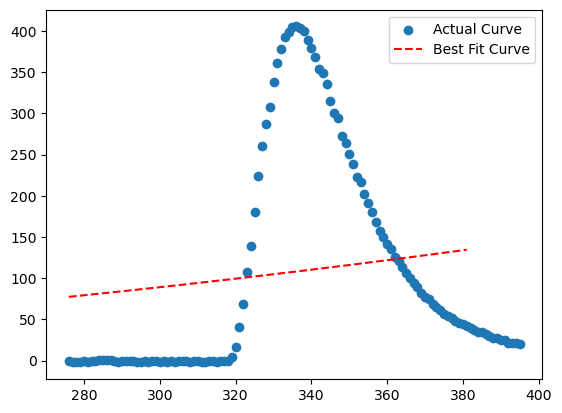

In [17]:
#plot input and output
plt.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(x), max(x), 15)
# calculate the output for the range
y_line = lognorm(x_line, mu,sigma)
# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')
plt.legend(['Actual Curve', "Best Fit Curve"], loc="best")

##  Ex no. 2. Plotting text file data with Gaussian fitting curves

In [18]:
# load the dataset
data = np.loadtxt('C:/Users/Nikki/Mini Project Data/file_1.txt')
# choose the input and output variables
x, y = data[:, 0], data[:, 1]

In [19]:
print(data)

[[ 2.760e+02 -2.000e-01]
 [ 2.770e+02 -1.700e+00]
 [ 2.780e+02 -1.900e+00]
 [ 2.790e+02 -1.700e+00]
 [ 2.800e+02 -7.000e-01]
 [ 2.810e+02 -1.500e+00]
 [ 2.820e+02 -5.000e-01]
 [ 2.830e+02  0.000e+00]
 [ 2.840e+02  5.000e-01]
 [ 2.850e+02  2.000e-01]
 [ 2.860e+02  1.000e+00]
 [ 2.870e+02  5.000e-01]
 [ 2.880e+02 -7.000e-01]
 [ 2.890e+02 -1.500e+00]
 [ 2.900e+02 -2.000e-01]
 [ 2.910e+02  0.000e+00]
 [ 2.920e+02 -2.000e-01]
 [ 2.930e+02 -5.000e-01]
 [ 2.940e+02 -1.500e+00]
 [ 2.950e+02 -1.200e+00]
 [ 2.960e+02  0.000e+00]
 [ 2.970e+02 -1.500e+00]
 [ 2.980e+02 -2.000e-01]
 [ 2.990e+02 -5.000e-01]
 [ 3.000e+02 -2.200e+00]
 [ 3.010e+02 -2.000e-01]
 [ 3.020e+02 -1.200e+00]
 [ 3.030e+02 -1.000e+00]
 [ 3.040e+02 -1.700e+00]
 [ 3.050e+02 -1.000e+00]
 [ 3.060e+02 -5.000e-01]
 [ 3.070e+02  0.000e+00]
 [ 3.080e+02 -1.500e+00]
 [ 3.090e+02 -2.000e-01]
 [ 3.100e+02 -5.000e-01]
 [ 3.110e+02 -1.200e+00]
 [ 3.120e+02 -1.700e+00]
 [ 3.130e+02  0.000e+00]
 [ 3.140e+02 -1.000e+00]
 [ 3.150e+02 -1.200e+00]


In [20]:
def gauss(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

In [21]:
x1 = np.array(x)
n = len(x1)
mean = sum(x * y)/ sum(y)
sigma = np.sqrt(sum(y * (x - mean)**2) / sum(y))
print(mean, sigma)

popt,pcov = curve_fit(gauss, x, y, p0 = [1, mean, sigma])

345.3212747631352 15.06153396294031


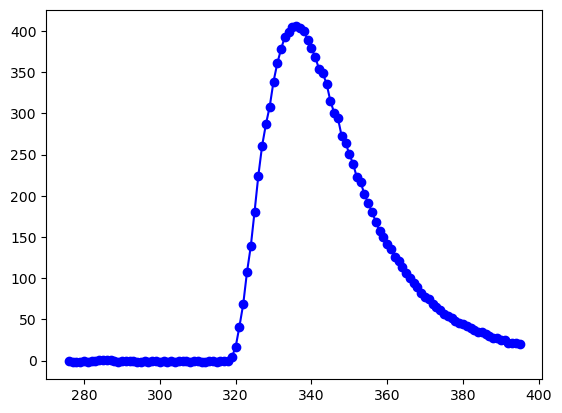

In [22]:
plt.plot(x, y, '-ob', label = 'Our Data');

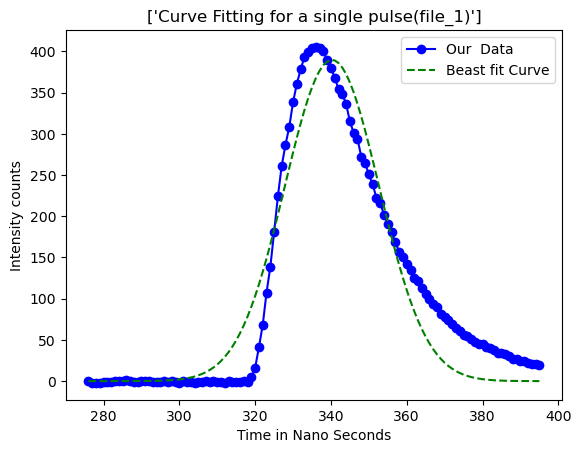

In [23]:
#Plotting oringinal data (Ocean blue):
plt.plot(x,y, '-ob', label = 'Our  Data');

# create a line plot for the mapping function (green) and plotting it.:
plt.plot(x, gauss(x, *popt), 'g--', label='Beast fit Curve')

#Adding title,labels and legends to the plot:
plt.legend()
plt.title(['Curve Fitting for a single pulse(file_1)'])
plt.xlabel('Time in Nano Seconds')
plt.ylabel('Intensity counts')
plt.show()

## 3. Multiple File Handling:

In [24]:
pwd

'C:\\Users\\Nikki'

[276. 277. 278. 279. 280. 281. 282. 283. 284. 285. 286. 287. 288. 289.
 290. 291. 292. 293. 294. 295. 296. 297. 298. 299. 300. 301. 302. 303.
 304. 305. 306. 307. 308. 309. 310. 311. 312. 313. 314. 315. 316. 317.
 318. 319. 320. 321. 322. 323. 324. 325. 326. 327. 328. 329. 330. 331.
 332. 333. 334. 335. 336. 337. 338. 339. 340. 341. 342. 343. 344. 345.
 346. 347. 348. 349. 350. 351. 352. 353. 354. 355. 356. 357. 358. 359.
 360. 361. 362. 363. 364. 365. 366. 367. 368. 369. 370. 371. 372. 373.
 374. 375. 376. 377. 378. 379. 380. 381. 382. 383. 384. 385. 386. 387.
 388. 389. 390. 391. 392. 393. 394. 395.]
[-2.000e-01 -1.700e+00 -1.900e+00 -1.700e+00 -7.000e-01 -1.500e+00
 -5.000e-01  0.000e+00  5.000e-01  2.000e-01  1.000e+00  5.000e-01
 -7.000e-01 -1.500e+00 -2.000e-01  0.000e+00 -2.000e-01 -5.000e-01
 -1.500e+00 -1.200e+00  0.000e+00 -1.500e+00 -2.000e-01 -5.000e-01
 -2.200e+00 -2.000e-01 -1.200e+00 -1.000e+00 -1.700e+00 -1.000e+00
 -5.000e-01  0.000e+00 -1.500e+00 -2.000e-01 -5.000e-01

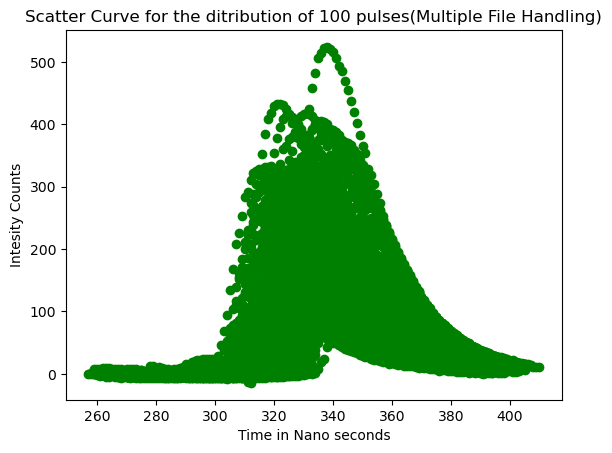

In [30]:
#Creating 2 empty listes to store the data of 2 different columns which we are going to read from the all files.
xm = list()
ym = list()
#Creating empty list to store the names of the files:
filename = list()


for i in range(0, 101):
    filename.append('file_'+str(i)+'.txt')        #multiple file reading command (important command)

    
for a in filename: 
    temp=list()
    for b in open(a):
        temp=b.split()
        xm.append(float(temp[0]))
        ym.append(float(temp[1]))
        
        
for i in range(0, len(xm)-1):
    smallest = i
    for j in range(i + 1, len(x)):
        if xm[j] < xm[smallest]:
            smallest = j
        
        
        
xm[i], xm[smallest] = xm[smallest], xm[i]
ym[i], ym[smallest] = ym[smallest], ym[i]

print(x)
print(y)
print()
#Plotting entire data (Green):
plt.scatter(xm,ym, color='green')
#Adding title, labels and title to the plot:
plt.title("Scatter Curve for the ditribution of 100 pulses(Multiple File Handling)")
plt.xlabel('Time in Nano seconds')
plt.ylabel('Intesity Counts')
plt.show()

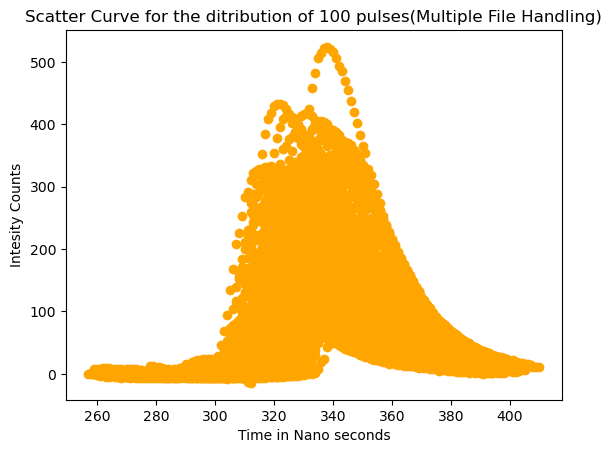

In [31]:
#Plotting entire data (orange):
plt.scatter(xm,ym, color='orange')
#Adding title, labels and title to the plot:
plt.title("Scatter Curve for the ditribution of 100 pulses(Multiple File Handling)")
plt.xlabel('Time in Nano seconds')
plt.ylabel('Intesity Counts')
plt.show()

## CONCLUSION:

- 1.We have learned how to the handle file in python
-i.  Generating data with noise
-ii. Gaussian Curve fit
-iii. Plotting Single file data
-iv. Multiple file Handling

- A curve or mathematical function that has the best fit to a series of data points, possibly subject to constraints.
-  An optimal set of parameters for a defined function that best fits a given set of observations.
-  We had imported scipy.optimized to fit our data. We can learn more about curve_fit by using the help function within scipy online documentation.
- The curve_fit function has two required inputs: the function you want to fit, the x-data, and the y-data you fit.
- We use ("for loop") for mutiple file handling
-  We used ("for loop") for sorting and arranging data in order and avoid scatterness of the plot.
- Adding titles and lables to plot the graph in python by using different colors.

# Thank You!!!